In [1]:
import pandas as pd
data=pd.read_csv("C:/Users/Raghav Rastogi/Desktop/ml/Datasets/car_price.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


C:\Users\Raghav Rastogi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64.
  from ipykernel import kernelapp as app


rmse : 0.9788828123714364

theta :
 [[ 3.36571786e-03]
 [ 1.83731010e-02]
 [ 4.49252718e-02]
 [ 5.55613872e-02]
 [ 7.55169246e-02]
 [ 1.93331979e-02]
 [ 7.96083773e-02]
 [ 8.32869833e-02]
 [ 5.32834460e-02]
 [ 2.07119513e-02]
 [ 1.34160291e-02]
 [ 6.90887335e-02]
 [ 9.94492712e-03]
 [-2.66212529e-02]
 [-2.45059624e-02]
 [ 1.59471316e-02]
 [ 1.77100470e-02]
 [ 6.07772698e-03]
 [ 2.75794516e-02]
 [ 8.73957934e-03]
 [ 2.49175993e-02]
 [ 2.88044088e-02]
 [ 2.56459024e-02]
 [-2.22791197e-02]
 [ 1.83987889e-02]
 [-1.69128019e-02]
 [-8.49700294e-03]
 [-2.14427740e-02]
 [ 6.35969556e-02]
 [-7.39935246e-03]
 [ 4.10565311e-02]
 [-8.47557652e-03]
 [ 8.69508366e-03]
 [-2.32598915e-02]
 [ 1.65079890e-02]
 [ 2.22358081e-02]
 [ 2.87257785e-02]
 [-1.07720127e-02]
 [ 6.60371600e-02]
 [ 2.63484505e-02]
 [-1.01121519e-01]
 [ 4.12051263e-02]
 [ 7.03175484e-07]
 [ 1.19592707e-02]
 [-1.07720127e-02]
 [ 2.75667408e-03]
 [-7.26733418e-03]
 [-9.12609354e-03]
 [ 1.59471316e-02]
 [ 1.35606853e-03]
 [ 3.07696247e

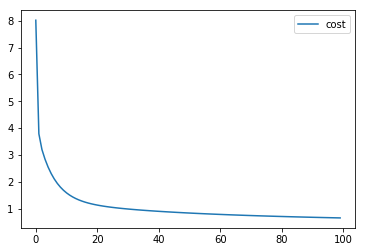

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
data_1=pd.read_csv("C:/Users/Raghav Rastogi/Desktop/ml/Datasets/car_price.csv")
data_1=data_1.drop(['car_ID','CarName'],axis=1)
#data_1=minmax_scale(data_1,feature_range=(0,10))
data_1.head()
#d_data=pd.get_dummies(data_1)
x1=data_1.iloc[:,:-1]
y1=data_1.iloc[:,-1]
x1=pd.get_dummies(x1)


x1=minmax_scale(x1,feature_range=(0,10))
y1=minmax_scale(y1,feature_range=(0,10))
#x=pd.DataFrame(x)
#now x and y are all numpy array





N=len(x1)

x1=np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
no_of_var=x1.shape[1]
theta=np.zeros((no_of_var,1))
iteration=100
lrate=0.001
mcost=np.zeros(iteration)
for i in range(iteration):
    pred=np.dot(x1,theta)#we cannot substract (47,1) and (47,) array result would be (47,47)
    pred=pred[:,0]
    #print(pred.shape)
    mcost[i]=(1/N)*sum((y1-pred)**2)
    #cost=(1/(2*m))*sum((ypred1-y)**2)
    for p in range(theta.shape[0]):
        theta[p]=theta[p]-(lrate/N)*sum(np.multiply((pred-y1),x1[:,p]))
        #it gives right results when we do pred-y1 and wrong when we do y1-pred
rmse=(sum((y1-pred)**2)/N)**.05
print("rmse :",rmse)
print("\ntheta :\n",theta)
plt.plot(np.arange(iteration),mcost,label='cost')
plt.legend(loc=1)
plt.show()



## here we have 52 features so we can use PAIR PLOT to visualize the regression 

In [14]:
a=np.arange(1,6,1)
#a.reshape((10,1))
b=np.arange(1,6,1)
np.matmul(a,b)

55

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)


regressor = LinearRegression()  
regressor.fit(X_train, y_train)


#To retrieve the intercept:
print("intercept: ",regressor.intercept_)#For retrieving the slope:
print("coeffs: \n",regressor.coef_)


y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
rmse_1=(sum((y_test-y_pred)**2)/N)**.05
print("rmse_1: ",rmse_1)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

max(y1)

intercept:  2451492509902.695
coeffs: 
 [-2.45149251e+12  6.46290113e-02  2.52464475e-01 -1.14221079e-01
  1.58851163e-01  1.50169118e-02  2.54800565e-01  4.68607389e-01
 -1.16452772e-01 -7.90518531e-02 -3.63923459e-01  1.34804777e-01
  8.25611021e-02  1.75949212e-01 -3.10456901e-02  9.15178964e-02
 -9.15178964e-02 -1.33429212e-02  1.33429212e-02  2.14013986e-02
 -2.14013986e-02  1.24635885e-01 -1.99415164e-02 -3.23945902e-02
 -1.64290049e-02 -5.58707731e-02 -2.99800387e-02 -2.11404035e-02
  5.11204421e-02 -1.52232962e-01  1.52232962e-01 -6.25896695e-03
 -1.66533454e-16 -1.07502552e-01  3.89890091e-02  7.00954471e-02
 -6.15058043e-02  6.61828671e-02  5.84470741e-02 -2.78606542e-02
 -8.09832998e-02 -2.71367139e-02  0.00000000e+00  1.13507267e-02
  6.61828671e-02  3.91316781e-02 -1.01481642e-02 -5.53199782e-02
  9.15178964e-02 -3.95542427e-02 -1.52273877e-02 -2.99502968e-02
  1.95504951e-02]
rmse_1:  0.9190216000551357
Mean Absolute Error: 0.648648122107284
Mean Squared Error: 0.92360097

10.0